In [1]:
from sketch import KTSketch
from scipy.stats import kendalltau
import numpy as np
from tqdm import tqdm
import time
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
dim = 100000
rank_a = np.arange(dim)
rank_b = np.arange(dim)

nSim = 1000
difference = []
time_difference = []
for i in tqdm(range(nSim)):
    np.random.shuffle(rank_a)
    np.random.shuffle(rank_b)
    
    ktsketch = KTSketch(epsilon=0.05,CI=0.95,dim=dim)
    
    time_now = time.time()
    corr_approx = ktsketch.correlation(rank_a,rank_b)
    time_approx = time.time() - time_now
    
    time_now = time.time()
    corr = kendalltau(rank_a,rank_b)[0]
    time_corr = time.time() - time_now
    
    difference.append(corr - corr_approx)
    time_difference.append(time_corr / time_approx)

100%|██████████| 1000/1000 [00:45<00:00, 22.14it/s]


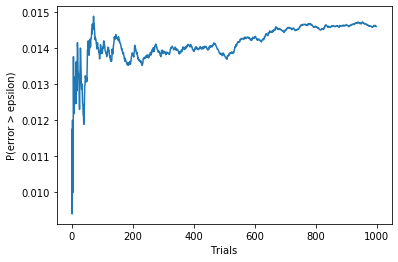

In [3]:
convergence = np.cumsum(np.abs(np.array(difference)))/(np.arange(len(difference))+1)
plt.ylabel("P(error > epsilon)")
plt.xlabel("Trials")
plt.plot(convergence)

In [4]:
speedup = np.mean(np.array(time_difference))
print("Speed Up :{0:.1f}X".format(speedup))

Speed Up :73.4X
